
Subfolder: AbdomenCT
Number of Images: 10000


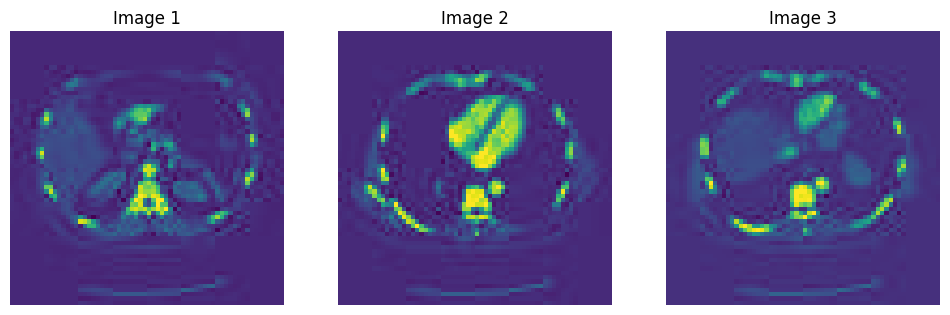


Subfolder: BreastMRI
Number of Images: 8954


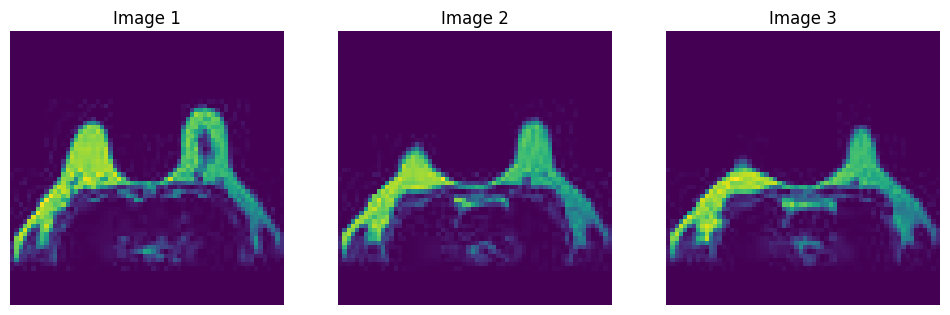


Subfolder: CXR
Number of Images: 10000


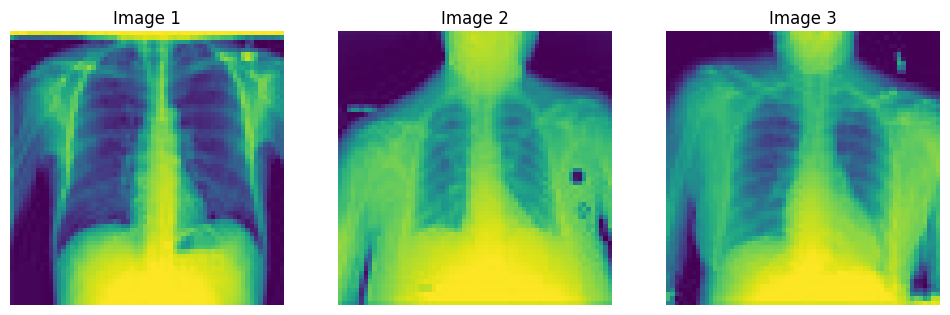


Subfolder: ChestCT
Number of Images: 10000


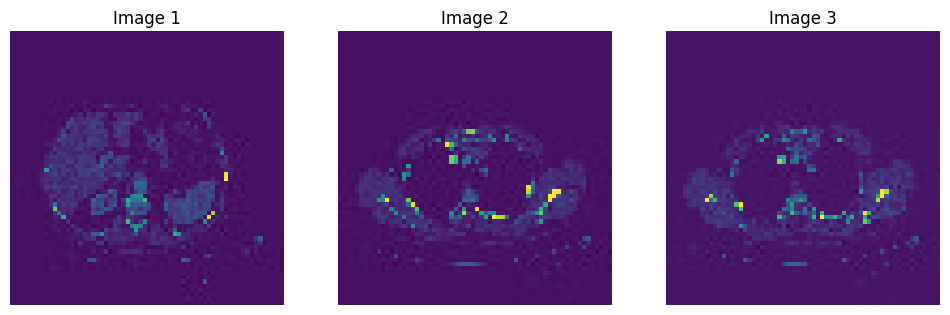


Subfolder: Hand
Number of Images: 10000


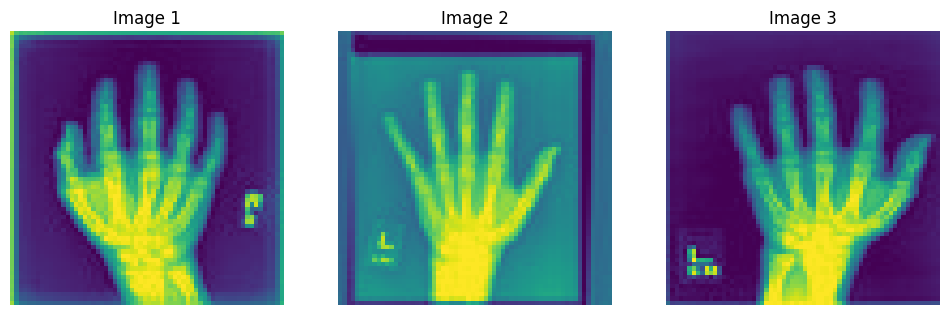


Subfolder: HeadCT
Number of Images: 10000


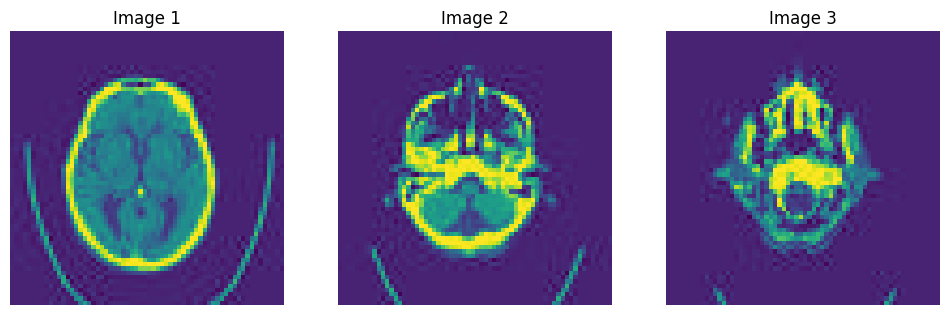

In [2]:
import os
from PIL import Image
import matplotlib.pyplot as plt

main_folder_path = "./MedMNIST"

# Function to visualize sample images from a subfolder
def visualize_images(subfolder_path, num_images=3):
    images = os.listdir(subfolder_path)[:num_images]
    
    plt.figure(figsize=(12, 4))
    
    for i, image_name in enumerate(images, 1):
        image_path = os.path.join(subfolder_path, image_name)
        image = Image.open(image_path)
        
        plt.subplot(1, num_images, i)
        plt.imshow(image)
        plt.title(f"Image {i}")
        plt.axis("off")
    
    plt.show()

subfolders = ["AbdomenCT", "BreastMRI", "CXR", "ChestCT", "Hand", "HeadCT"]

for subfolder in subfolders:
    subfolder_path = os.path.join(main_folder_path, subfolder)
    
    print(f"\nSubfolder: {subfolder}")
    print(f"Number of Images: {len(os.listdir(subfolder_path))}")
    
    visualize_images(subfolder_path)

In [3]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Function to load and preprocess images from a subfolder
def load_and_preprocess_images(main_folder_path, subfolders, target_size=(128, 128)):
    images = []
    labels = []

    for class_label, subfolder in enumerate(subfolders):
        subfolder_path = os.path.join(main_folder_path, subfolder)

        for image_name in os.listdir(subfolder_path):
            image_path = os.path.join(subfolder_path, image_name)

            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            image = cv2.resize(image, target_size)

            image = image / 255.0

            images.append(image)
            labels.append(class_label)

    return np.array(images), np.array(labels)

main_folder_path = "./MedMNIST"
subfolders = ["AbdomenCT", "BreastMRI", "CXR", "ChestCT", "Hand", "HeadCT"]

all_images, all_labels = load_and_preprocess_images(main_folder_path, subfolders)

data_train, data_test, labels_train, labels_test = train_test_split(
    all_images, all_labels, test_size=0.2, random_state=42, stratify=all_labels
)

train_labels_onehot = to_categorical(labels_train, num_classes=len(subfolders))
test_labels_onehot = to_categorical(labels_test, num_classes=len(subfolders))

In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(len(subfolders), activation='softmax'))  # Output layer with the number of classes

# Compiling the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


model.summary()

# Training the model
history = model.fit(data_train.reshape(-1, 128, 128, 1), train_labels_onehot, 
                    epochs=10, 
                    validation_data=(data_test.reshape(-1, 128, 128, 1), test_labels_onehot))

c:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 50176)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     3,211,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           390 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,267,462 (12.46 MB)

 Trainable params: 3,267,462 (12.46 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1474/1474 ━━━━━━━━━━━━━━━━━━━━ 221s 149ms/step - accuracy: 0.9548 - loss: 0.1314 - val_accuracy: 0.9969 - val_loss: 0.0166
Epoch 2/10
1474/1474 ━━━━━━━━━━━━━━━━━━━━ 224s 152ms/step - accuracy: 0.9972 - loss: 0.0101 - val_accuracy: 0.9953 - val_loss: 0.0161
Epoch 3/10
1474/1474 ━━━━━━━━━━━━━━━━━━━━ 218s 148ms/step - accuracy: 0.9984 - loss: 0.0052 - val_accuracy: 0.9989 - val_loss: 0.0033
Epoch 4/10
1474/1474 ━━━━━━━━━━━━━━━━━━━━ 216s 147ms/step - accuracy: 0.9994 - loss: 0.0014 - val_accuracy: 0.9972 - val_loss: 0.0113
Epoch 5/10
1474/1474 ━━━━━━━━━━━━━━━━━━━━ 213s 145ms/step - accuracy: 0.9954 - loss: 0.0176 - val_accuracy: 0.9994 - val_loss: 0.0022
Epoch 6/10
1474/1474 ━━━━━━━━━━━━━━━━━━━━ 209s 142ms/step - accuracy: 0.9993 - loss: 0.0035 - val_accuracy: 0.9990 - val_loss: 0.0032
Epoch 7/10
1474/1474 ━━━━━━━━━━━━━━━━━━━━ 209s 142ms/step - accuracy: 0.9997 - loss: 7.6686e-04 - val_accuracy: 0.9975 - val_loss: 0.0167
Epoch 8/10
1474/1474 ━━━━━━━━━━━━━━━━━━━━ 209s 142ms/step 

369/369 ━━━━━━━━━━━━━━━━━━━━ 13s 35ms/step


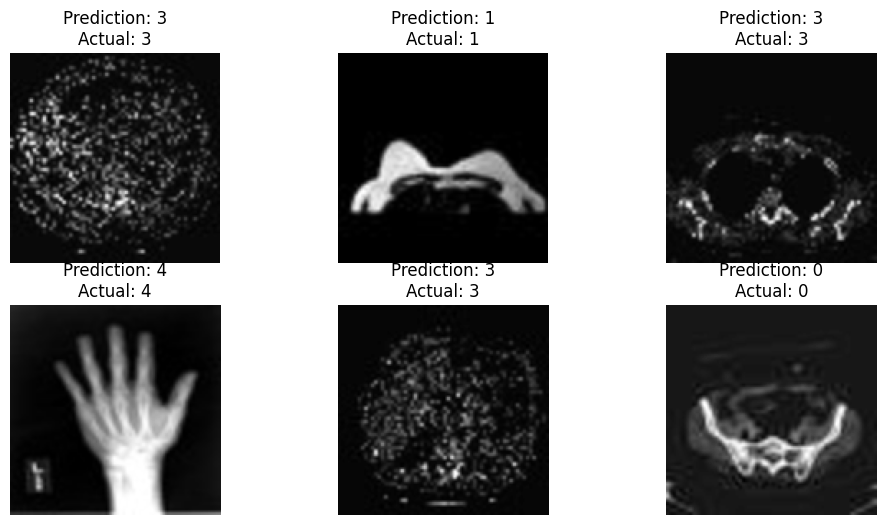

In [5]:
# Function to make predictions on test images
def predict_images(model, test_images):
    predictions = model.predict(test_images)
    return predictions

test_predictions = predict_images(model, data_test.reshape(-1, 128, 128, 1))

plt.figure(figsize=(12, 6))

for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(data_test[i], cmap='gray')
    plt.title(f"Prediction: {np.argmax(test_predictions[i])}\nActual: {labels_test[i]}")
    plt.axis("off")

plt.show()

In [6]:
# Saving the trained model in .h5
model.save("./model/medical_mnist_model.h5")

print("Model saved successfully.")

Model saved successfully.


In [7]:
# Saving the model in the native Keras format
model.save("./model/medical_mnist_model.keras")

print("Model saved successfully in the native Keras format.")

Model saved successfully in the native Keras format.


In [1]:
print(data_test)

NameError: name 'data_test' is not defined